In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from helpers import Domain, calculate_pressure
from load_data import get_fit_params_from_pdbshot, load_single_pulse_struct, PulseStruct, KineticProfileStruct, SignalStruct
import pickle
from dataclasses import dataclass 
import scienceplots 
plt.style.use(['grid', 'science'])

LOCAL_SAVE_DIR = "/home/akadam/EUROfusion/2024/pedestal_transport/models/data_driven/outputs"
JET_PDB_DIR    = "/home/akadam/EUROfusion/2024/data"
BASE_PULSE_DIR = JET_PDB_DIR


In [9]:
shot_num = 83624

exp_interelmtimes = np.load(os.path.join(LOCAL_SAVE_DIR, f"{shot_num}_exp_interelmtimes.npy"))
scan_growths       = np.load(os.path.join(LOCAL_SAVE_DIR, f"{shot_num}_scan_growths.npy"))
sim_interelmtimes  = np.load(os.path.join(LOCAL_SAVE_DIR, f"{shot_num}_sim_interelmtimes.npy"))


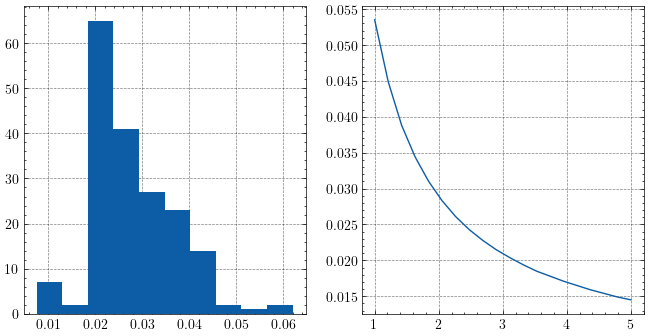

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(exp_interelmtimes)
axs[1].plot(scan_growths, sim_interelmtimes)
plt.show()

[0.09698845 0.94787188 0.01460261]


/tmp/ipykernel_1229681/4150238100.py:7: RuntimeWarning: invalid value encountered in log
  return -np.log((tau - d) / a) / b


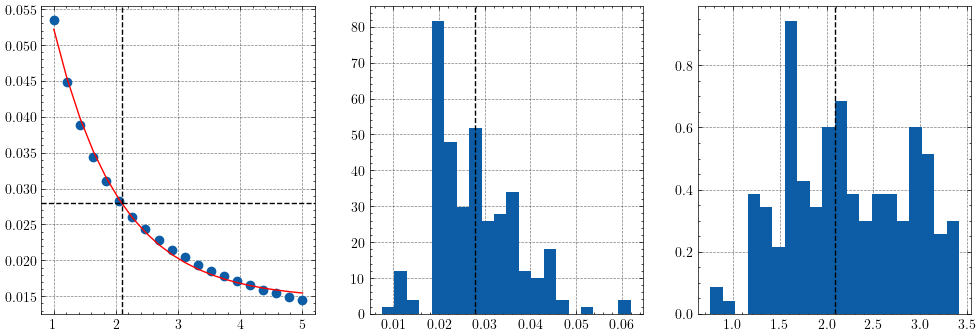

In [26]:
def f_tau_given_c_sim(c_g, a, b, d): 
    # Computes the expected tau from c_growth
    return a * np.exp(-b * c_g) + d

def f_inv(tau, a, b, d): 
    # Computes the expected c_growth from tau
    return -np.log((tau - d) / a) / b

# cru
from scipy.optimize import curve_fit 

popt, pcov = curve_fit(f_tau_given_c_sim, scan_growths, sim_interelmtimes)
print(popt)
c_data_inv = f_inv(exp_interelmtimes, *popt)


fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(scan_growths, sim_interelmtimes, 'o')
ax[0].plot(scan_growths, f_tau_given_c_sim(scan_growths, *popt), 'r-')
ax[0].axhline(exp_interelmtimes.mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].hist(exp_interelmtimes, bins=20, density=True)
ax[1].axvline(exp_interelmtimes.mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].axvline(f_inv(exp_interelmtimes.mean(), *popt), color='k', linestyle='dashed', linewidth=1)
ax[2].axvline(f_inv(exp_interelmtimes.mean(), *popt), color='k', linestyle='dashed', linewidth=1)
ax[2].hist(c_data_inv, bins=20, density=True)

plt.show()